2025-07-12 16:30:02.036210: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752337802.289448      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752337802.361875      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


1. Menyiapkan data deret waktu...


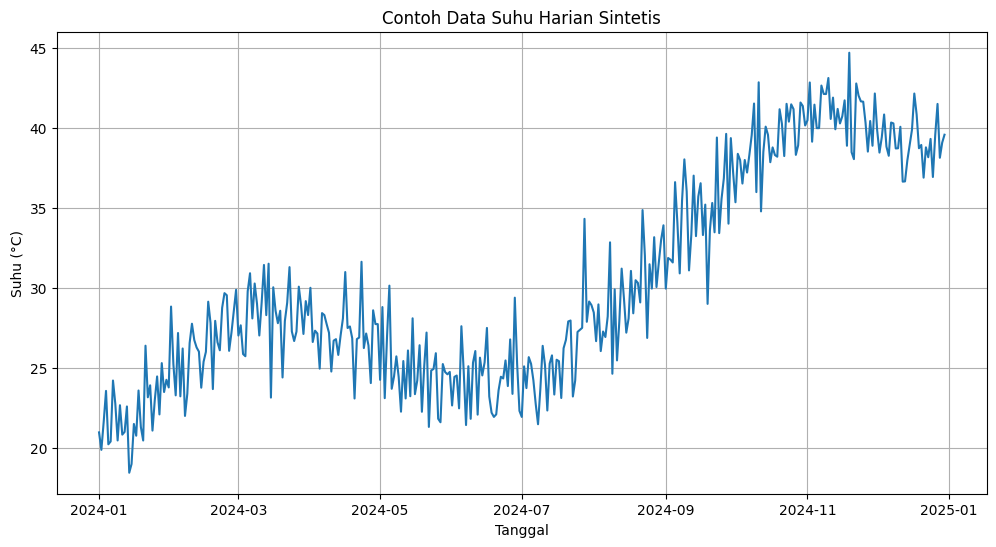

2. Melakukan preprocessing data...
Shape X_train: (268, 30, 1)
Shape y_train: (268,)
Shape X_test: (67, 30, 1)
Shape y_test: (67,)

3. Membangun model LSTM...


2025-07-12 16:30:17.795590: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)


4. Melatih model LSTM...
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 0.0926 - val_loss: 0.0093
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0180 - val_loss: 0.0323
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0114 - val_loss: 0.0552
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0102 - val_loss: 0.0125
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0101 - val_loss: 0.0183
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0106 - val_loss: 0.0230
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0105 - val_loss: 0.0091
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0082 - val_loss: 0.0082
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0100 - val_loss: 0.0118
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0094 - val_loss: 0.0050
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0080 - val_loss: 0.0057
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/s

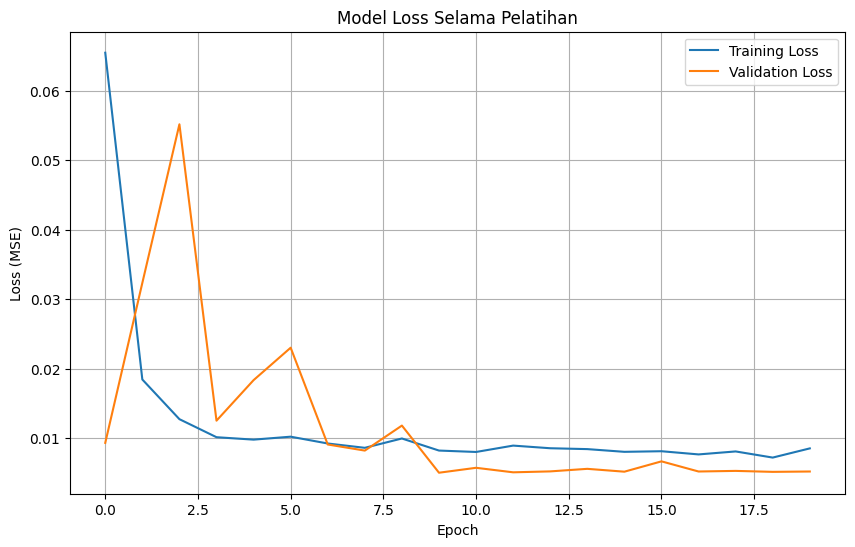


5. Mengevaluasi model...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

--- Metrik Evaluasi ---
RMSE (Root Mean Squared Error) pada Training Set: 2.20
MAE (Mean Absolute Error) pada Training Set: 1.74
RMSE (Root Mean Squared Error) pada Test Set: 2.23
MAE (Mean Absolute Error) pada Test Set: 1.87


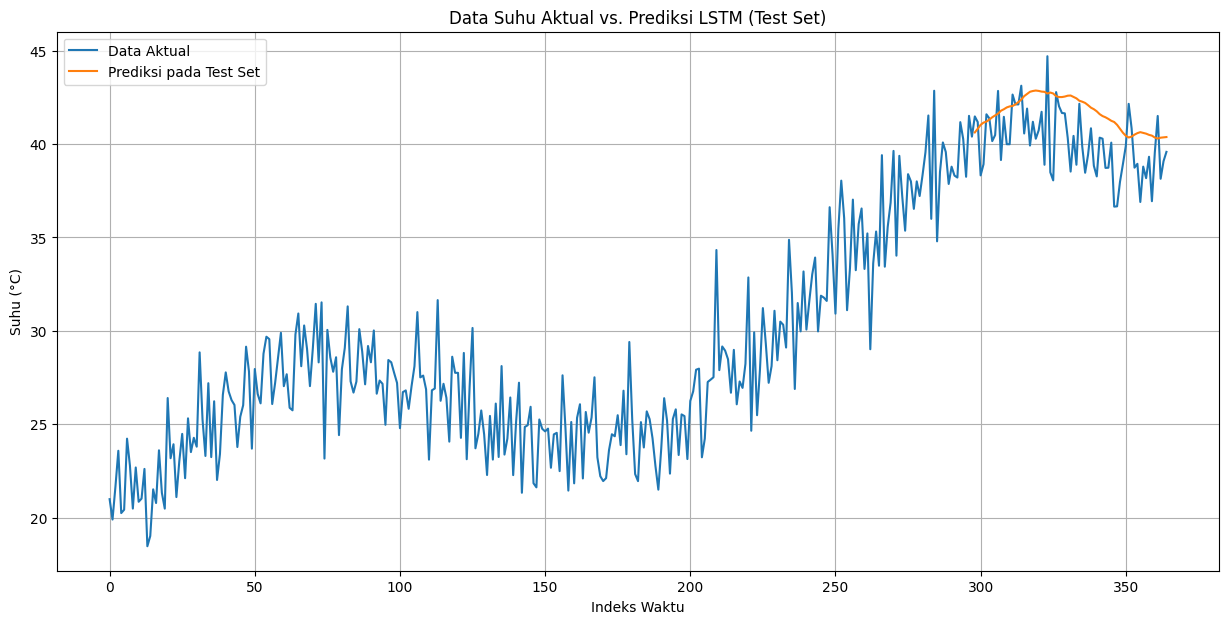


Prediksi selesai!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# --- 1. Persiapan Data (Contoh Data Suhu Harian Sintetis) ---
print("1. Menyiapkan data deret waktu...")
# Membuat data suhu harian sintetis untuk 365 hari (1 tahun)
np.random.seed(42) # Untuk reproduktifitas
dates = pd.date_range(start='2024-01-01', periods=365, freq='D')
# Menambahkan tren naik, musiman (sinusoida), dan sedikit noise
temperatures = 20 + np.arange(365) * 0.05 + 5 * np.sin(np.linspace(0, 3 * np.pi, 365)) + np.random.randn(365) * 2

data = pd.DataFrame({'Date': dates, 'Temperature': temperatures})
data.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data['Temperature'])
plt.title('Contoh Data Suhu Harian Sintetis')
plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.grid(True)
plt.show()

# --- 2. Preprocessing Data ---
print("2. Melakukan preprocessing data...")

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Temperature'].values.reshape(-1, 1))

# Fungsi untuk membuat sekuens (X) dan target (y)
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

LOOK_BACK = 30 # Berapa banyak hari sebelumnya yang akan digunakan untuk memprediksi hari berikutnya

X, y = create_sequences(scaled_data, LOOK_BACK)

# Membagi data menjadi training dan testing
# Sekitar 80% training, 20% testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Reshape input menjadi format [samples, time steps, features] untuk LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

# --- 3. Membangun Model LSTM ---
print("\n3. Membangun model LSTM...")

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(LOOK_BACK, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Output tunggal untuk prediksi suhu

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# --- 4. Melatih Model ---
print("\n4. Melatih model LSTM...")

# Early Stopping untuk mencegah overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100, # Jumlah epoch bisa disesuaikan
    batch_size=32,
    validation_split=0.1, # Menggunakan sebagian data training sebagai validasi
    callbacks=[early_stopping],
    verbose=1
)

# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# --- 5. Evaluasi Model ---
print("\n5. Mengevaluasi model...")

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Prediksi pada data training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inversi normalisasi untuk mendapatkan nilai suhu asli
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Hitung metrik evaluasi
rmse_train = math.sqrt(mean_squared_error(y_train_actual, train_predict))
mae_train = mean_absolute_error(y_train_actual, train_predict)
rmse_test = math.sqrt(mean_squared_error(y_test_actual, test_predict))
mae_test = mean_absolute_error(y_test_actual, test_predict)

print(f"\n--- Metrik Evaluasi ---")
print(f"RMSE (Root Mean Squared Error) pada Training Set: {rmse_train:.2f}")
print(f"MAE (Mean Absolute Error) pada Training Set: {mae_train:.2f}")
print(f"RMSE (Root Mean Squared Error) pada Test Set: {rmse_test:.2f}")
print(f"MAE (Mean Absolute Error) pada Test Set: {mae_test:.2f}")

# Visualisasi Hasil Prediksi vs. Aktual (Test Set)
plt.figure(figsize=(15, 7))
# Buat array untuk plotting agar pas dengan indeks waktu
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + LOOK_BACK:len(scaled_data), :] = test_predict

plt.plot(scaler.inverse_transform(scaled_data), label='Data Aktual')
plt.plot(test_predict_plot, label='Prediksi pada Test Set')
plt.title('Data Suhu Aktual vs. Prediksi LSTM (Test Set)')
plt.xlabel('Indeks Waktu')
plt.ylabel('Suhu (°C)')
plt.legend()
plt.grid(True)
plt.show()

print("\nPrediksi selesai!")